<a href="https://colab.research.google.com/github/Shu12388y/30-Days-Of-Python/blob/master/pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

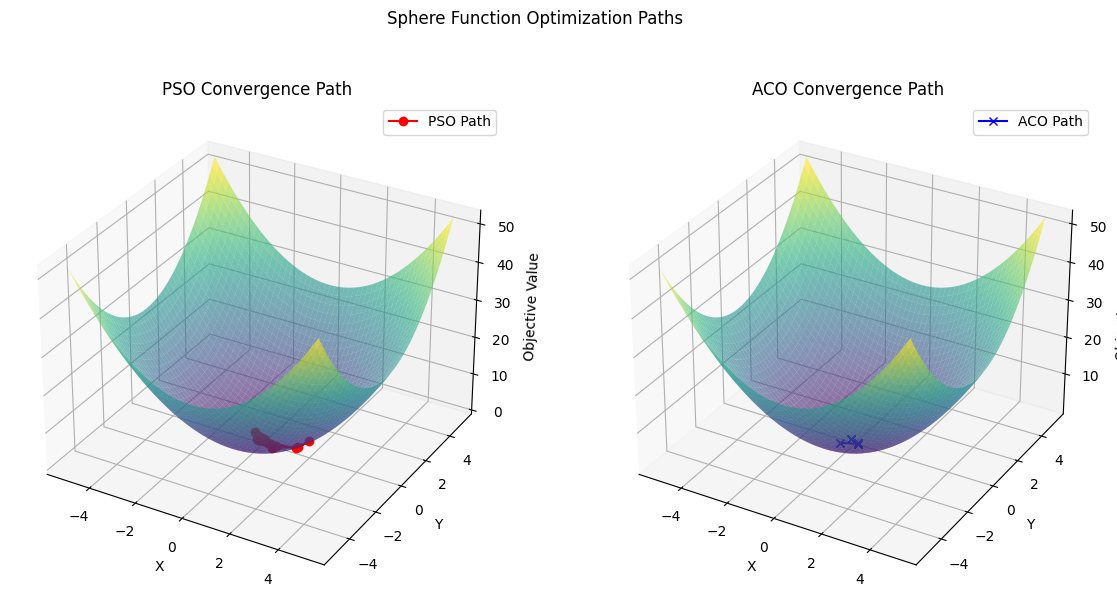

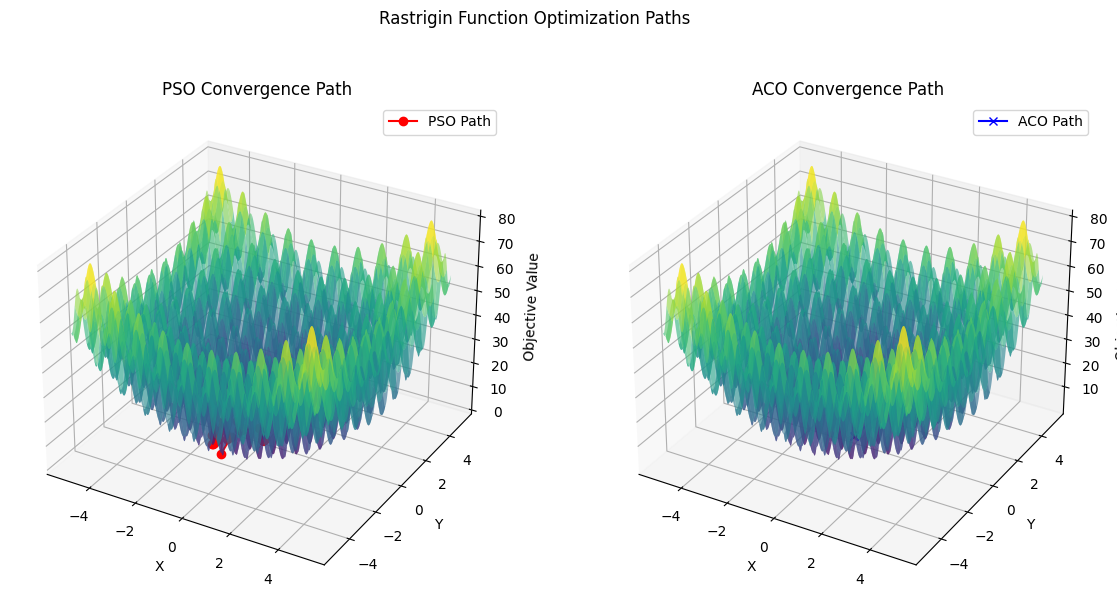

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Objective Functions
def sphere_function(x):
    return np.sum(x**2)

def rastrigin_function(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# PSO Implementation
class PSO:
    def __init__(self, obj_func, dim, swarm_size, max_iter):
        self.obj_func = obj_func
        self.dim = dim
        self.swarm_size = swarm_size
        self.max_iter = max_iter
        self.w = 0.5
        self.c1 = 1.5
        self.c2 = 1.5
        self.x = np.random.uniform(-5, 5, (swarm_size, dim))
        self.v = np.random.uniform(-1, 1, (swarm_size, dim))
        self.p_best = self.x.copy()
        self.g_best = self.x[np.argmin([self.obj_func(xi) for xi in self.x])]
        self.g_best_val = self.obj_func(self.g_best)
        self.positions = []

    def optimize(self):
        for _ in range(self.max_iter):
            for i in range(self.swarm_size):
                r1, r2 = np.random.rand(), np.random.rand()
                self.v[i] = (self.w * self.v[i] + self.c1 * r1 * (self.p_best[i] - self.x[i]) +
                             self.c2 * r2 * (self.g_best - self.x[i]))
                self.x[i] += self.v[i]
                if self.obj_func(self.x[i]) < self.obj_func(self.p_best[i]):
                    self.p_best[i] = self.x[i]
            current_best = self.x[np.argmin([self.obj_func(xi) for xi in self.x])]
            current_best_val = self.obj_func(current_best)
            if current_best_val < self.g_best_val:
                self.g_best = current_best
                self.g_best_val = current_best_val
            self.positions.append(self.g_best.copy())
        return self.g_best, self.g_best_val

# ACO Implementation (simplified for demonstration)
class ACO:
    def __init__(self, obj_func, dim, ant_count, max_iter):
        self.obj_func = obj_func
        self.dim = dim
        self.ant_count = ant_count
        self.max_iter = max_iter
        self.pheromones = np.ones((dim, dim))
        self.alpha = 1.0
        self.beta = 2.0
        self.evaporation_rate = 0.5
        self.best_solution = None
        self.best_cost = float('inf')
        self.positions = []

    def optimize(self):
        for _ in range(self.max_iter):
            solutions = []
            for _ in range(self.ant_count):
                solution = np.random.uniform(-5, 5, self.dim)
                solutions.append(solution)
            for solution in solutions:
                cost = self.obj_func(solution)
                if cost < self.best_cost:
                    self.best_cost = cost
                    self.best_solution = solution
            self.update_pheromones(solutions, self.best_solution)
            self.positions.append(self.best_solution.copy())
        return self.best_solution, self.best_cost

    def update_pheromones(self, solutions, best_solution):
        for i in range(self.dim):
            for j in range(self.dim):
                self.pheromones[i, j] *= (1 - self.evaporation_rate)
                if np.array_equal(solutions, best_solution):
                    self.pheromones[i, j] += 1.0 / self.obj_func(best_solution)

# Plotting 3D Landscapes and Convergence Paths
def plot_3d(func, pso_positions, aco_positions, title):
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(121, projection='3d')
    bx = fig.add_subplot(122, projection='3d')

    x = np.linspace(-5.12, 5.12, 400)
    y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([func(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
    bx.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

    pso_positions = np.array(pso_positions)
    aco_positions = np.array(aco_positions)

    ax.plot(pso_positions[:, 0], pso_positions[:, 1], [func(pos) for pos in pso_positions], color='r', marker='o', label='PSO Path')
    bx.plot(aco_positions[:, 0], aco_positions[:, 1], [func(pos) for pos in aco_positions], color='b', marker='x', label='ACO Path')

    ax.set_title('PSO Convergence Path')
    bx.set_title('ACO Convergence Path')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Objective Value')
    bx.set_xlabel('X')
    bx.set_ylabel('Y')
    bx.set_zlabel('Objective Value')

    ax.legend()
    bx.legend()

    plt.suptitle(title)
    plt.show()

# PSO and ACO on Sphere Function
pso_sphere = PSO(sphere_function, dim=2, swarm_size=30, max_iter=100)
aco_sphere = ACO(sphere_function, dim=2, ant_count=30, max_iter=100)

pso_sphere.optimize()
aco_sphere.optimize()

plot_3d(sphere_function, pso_sphere.positions, aco_sphere.positions, 'Sphere Function Optimization Paths')

# PSO and ACO on Rastrigin Function
pso_rastrigin = PSO(rastrigin_function, dim=2, swarm_size=30, max_iter=100)
aco_rastrigin = ACO(rastrigin_function, dim=2, ant_count=30, max_iter=100)

pso_rastrigin.optimize()
aco_rastrigin.optimize()

plot_3d(rastrigin_function, pso_rastrigin.positions, aco_rastrigin.positions, 'Rastrigin Function Optimization Paths')
